![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.


Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

# DATA VALIDATION

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#statistics
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

#Data preprocessing and modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

#warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option('display.max_rows',374)
pd.set_option('display.max_columns',374)



In [2]:
#read csv file
sleep_data = pd.read_csv('data.csv')
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#dimension
sleep_data.shape

(374, 13)

In [4]:
#duplicates?
sleep_data.duplicated().sum()

0

In [5]:
#missing values?
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
#general info
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
#stats
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
#stats for categorical variables
sleep_data.describe(exclude=np.number)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [9]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace('Normal Weight','Normal')

In [10]:
#Categorize the values
sleep_data['Blood Pressure'] = sleep_data['Blood Pressure'].apply(lambda x: 'Ideal' if x in ['120/80','117/76', '118/76','115/75','115/78', '119/77'] else( 'Normal' if x in ['126/83', '125/80','128/84', '129/84' , '121/79',
       '125/82', '122/80','118/75'] else 'High' ) )


In [11]:
sleep_data.groupby('Blood Pressure').size()

Blood Pressure
High      211
Ideal      84
Normal     79
dtype: int64

## Summary of Data Validation

-  The dataset contains 374 rows and 13 columns without missing values.I have validated all the columns against the criteria in the dataset table:
    -  Person ID: Numeric values without missing values. 
    -  Gender: Object values without missing values, 2 unique Genders
    -  Age: Numeric values, without missing values
    -  Occupation: 11 unique occupations without missing values
    -  Sleep Duration: Numeric values without missing values
    -  Quality of Sleep: Numeric values without missing values
    -  Physical Activity Level: Numeric values without missing values
    -  Stress Level:  Numeric values without missing values
    -  BMI Category: 4 unique object values instead of 3; I replaced 'Normal Weight' with 'Normal'
    -  Blood Pressure: object values I imputed as follow,'Ideal' for the systolic pressure less than 120 with the diastolic pressure less than 80, 'Normal' for the systolic pressure between 120-129 with the diastolic pressure between 80-84, High for any other pressure seperior to this values
    -  Heart Rate: Numeric values without missing values
    -  Daily Steps: Numeric values without missing values
    -  Sleep Disorder: Object type without missing values

- After the dataset validation, the dataset has 374 rows and 13 columns.

# Exploratory Data Analysis

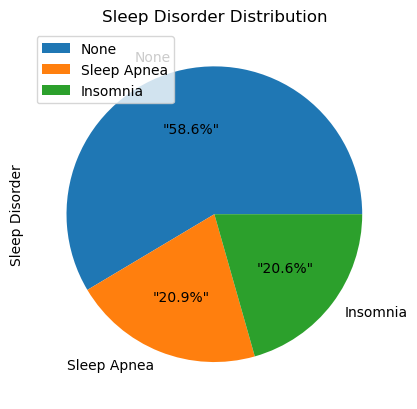

In [12]:
#let's visualize the target variable
sleep_data["Sleep Disorder"].value_counts().plot.pie(autopct='"%1.1f%%"')
plt.title("Sleep Disorder Distribution")
plt.legend()

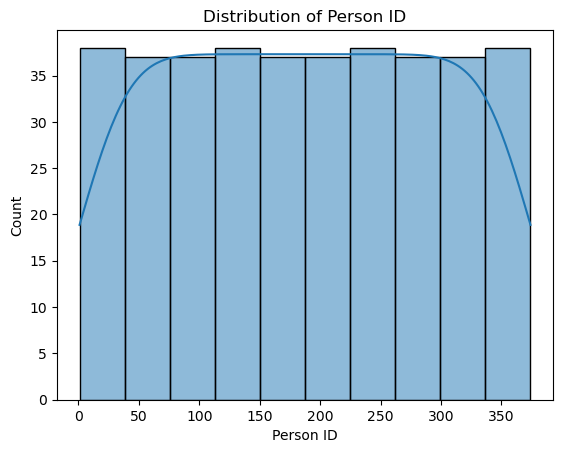

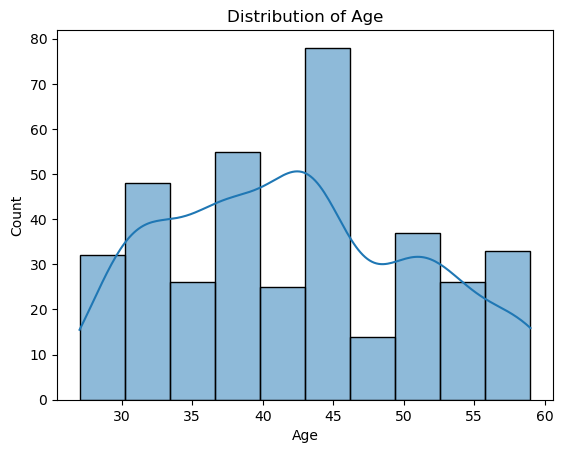

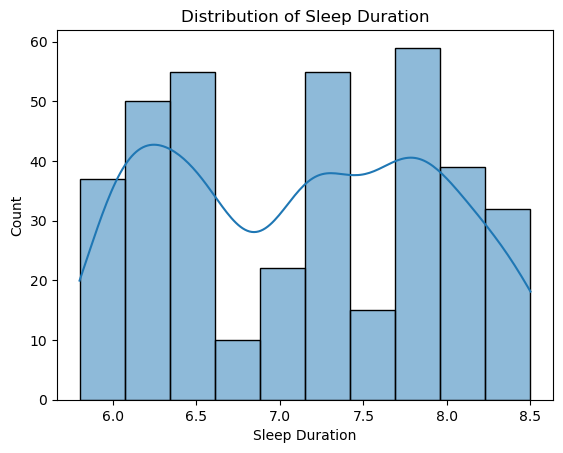

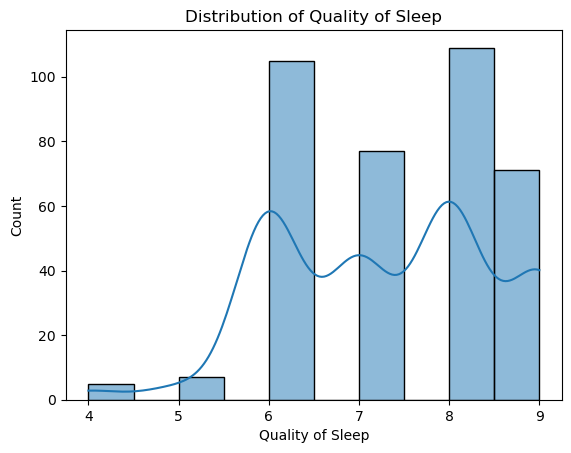

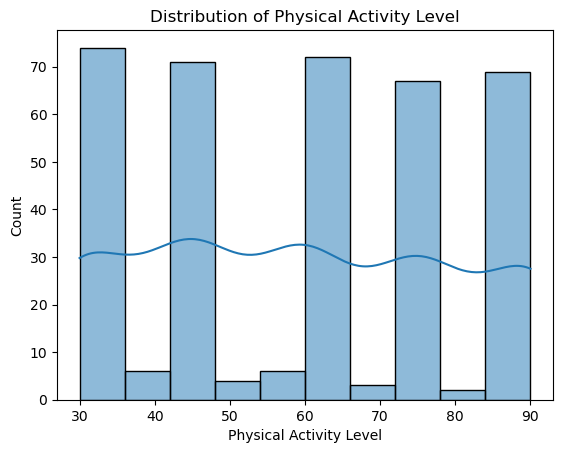

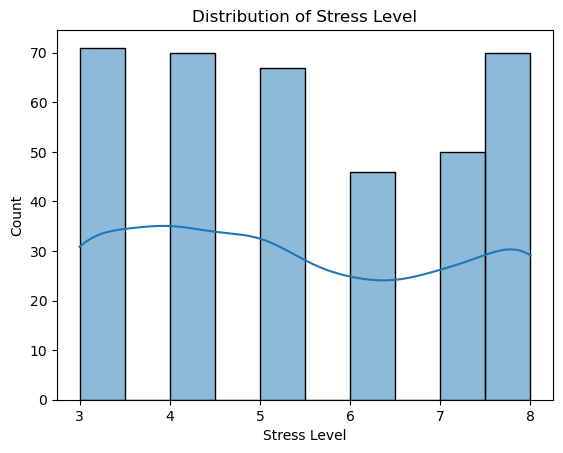

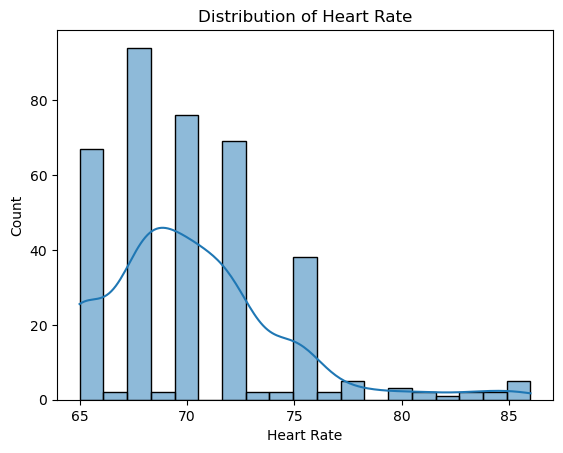

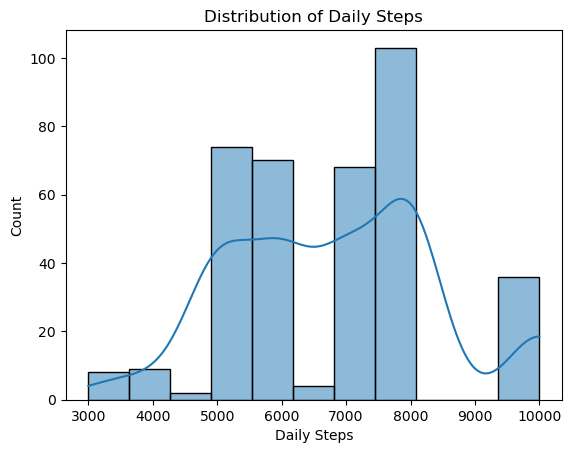

In [13]:
#Distributions of numerical variables
for dt in sleep_data.select_dtypes(include=["float","int"]):
    plt.figure()
    sns.histplot(sleep_data[dt], kde=True)
    plt.title(f"Distribution of {dt}")

In [14]:
#Normality test: Shapiro-Wilk
alpha =0.05
for col in sleep_data.select_dtypes(include=['int','float']):
    stat, p = shapiro(sleep_data[col])
    if p<alpha:
        print(f'H0 Rejected for {col}')
    else:
        print(f'H0 Accepted for {col}')
    

H0 Rejected for Person ID
H0 Rejected for Age
H0 Rejected for Sleep Duration
H0 Rejected for Quality of Sleep
H0 Rejected for Physical Activity Level
H0 Rejected for Stress Level
H0 Rejected for Heart Rate
H0 Rejected for Daily Steps


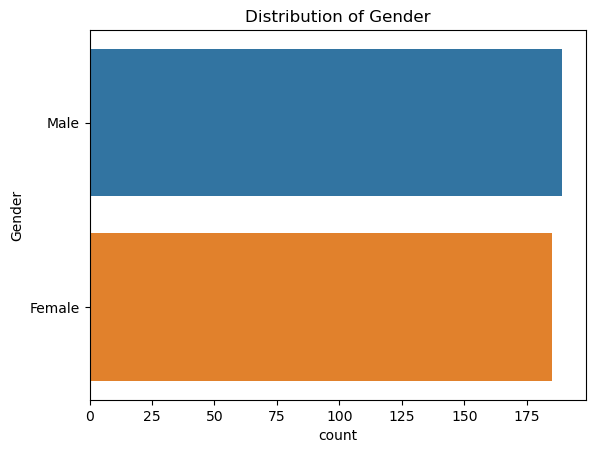

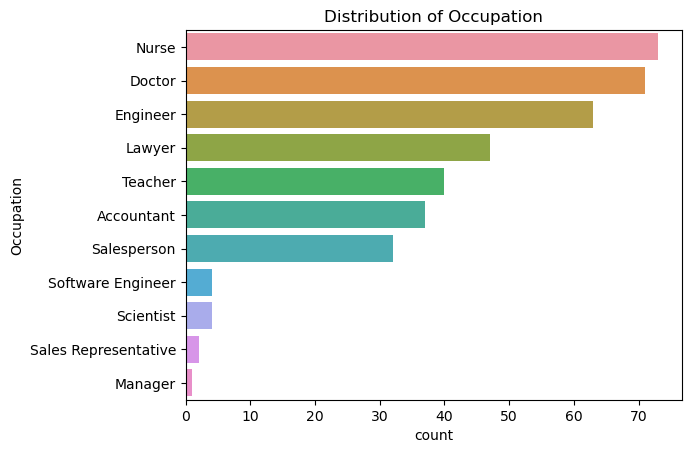

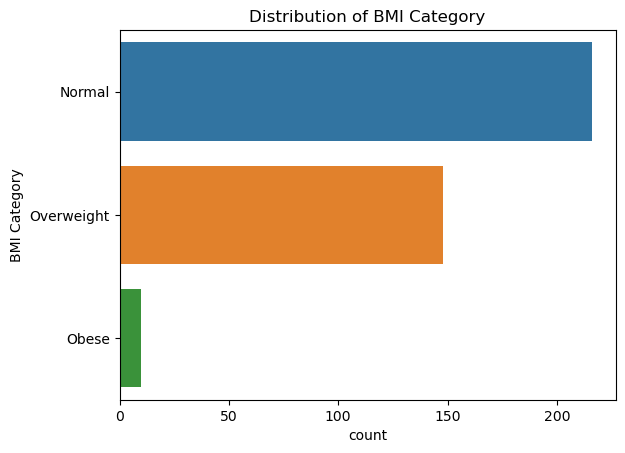

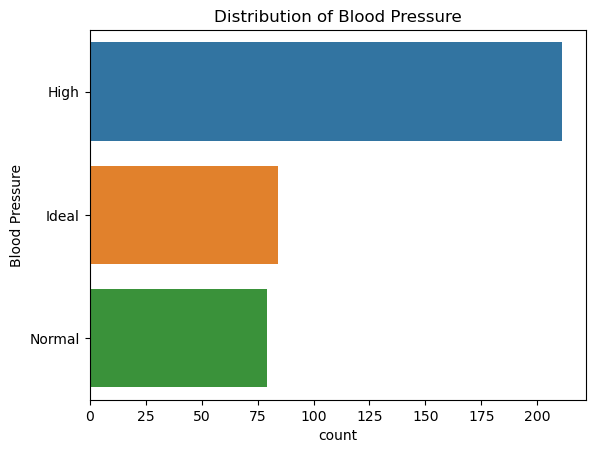

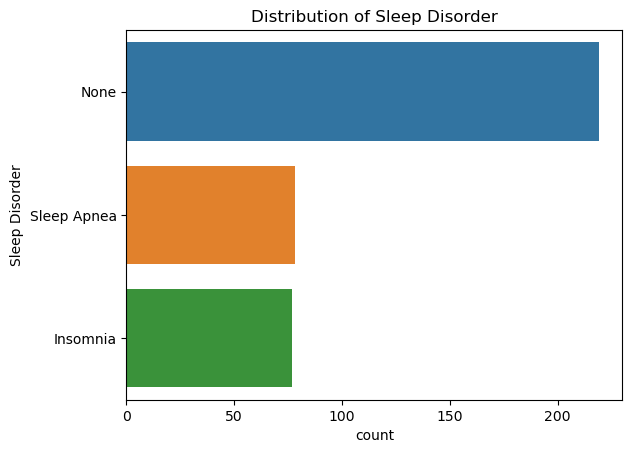

In [15]:
#distribution of categorical variables

for cat in sleep_data.select_dtypes(include='object'):
    plt.figure()
    cat_count = sleep_data[cat].value_counts()
    cat_sort = cat_count.index
    sns.countplot(data = sleep_data, y=cat, order=cat_sort)
    plt.title(f"Distribution of {cat}")

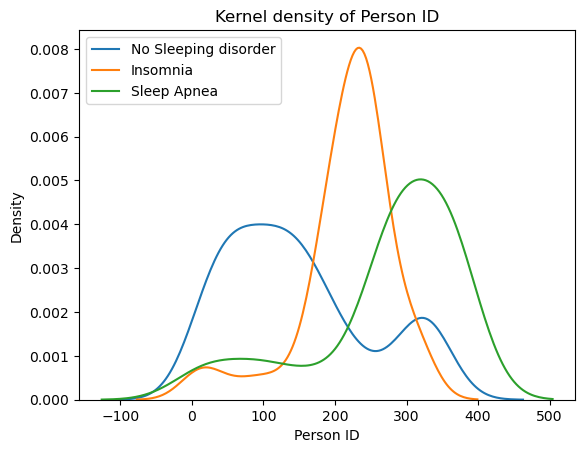

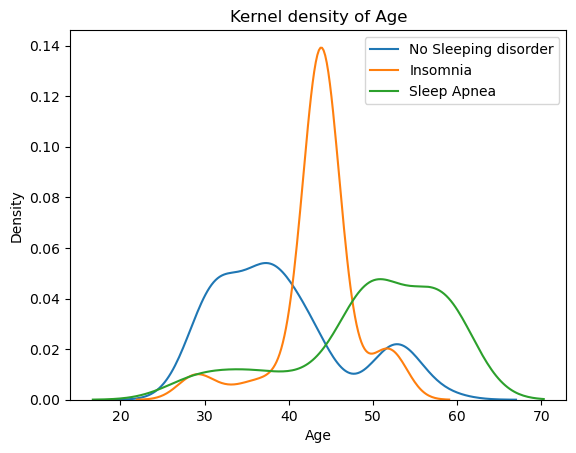

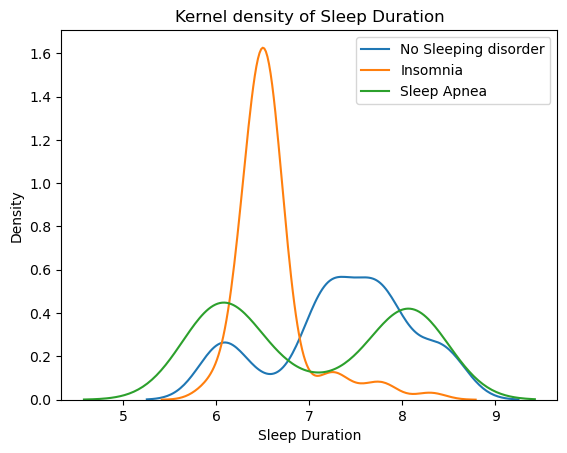

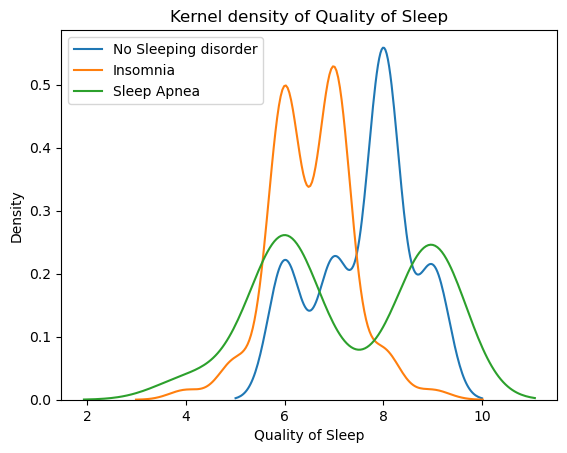

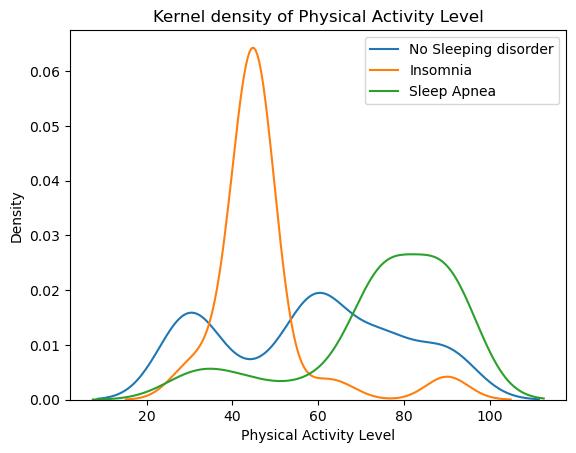

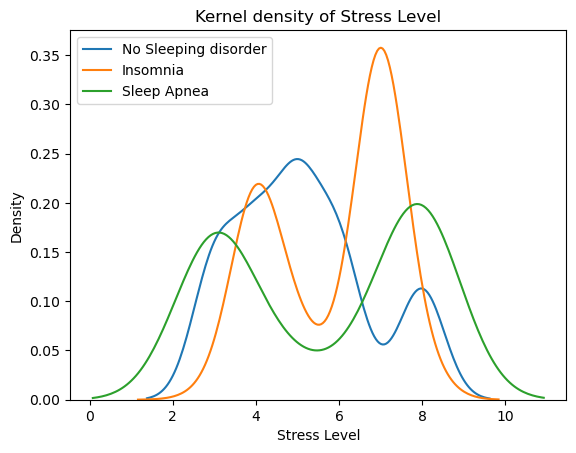

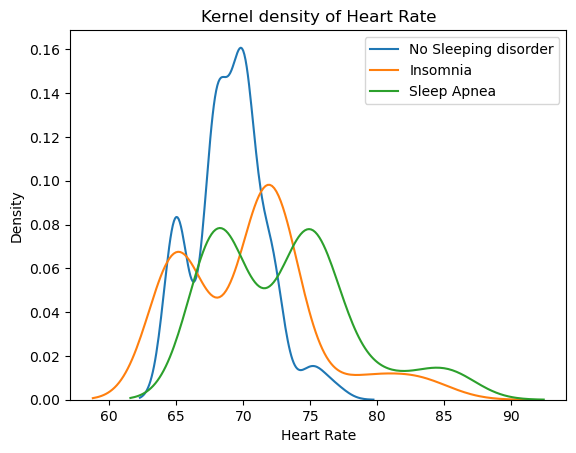

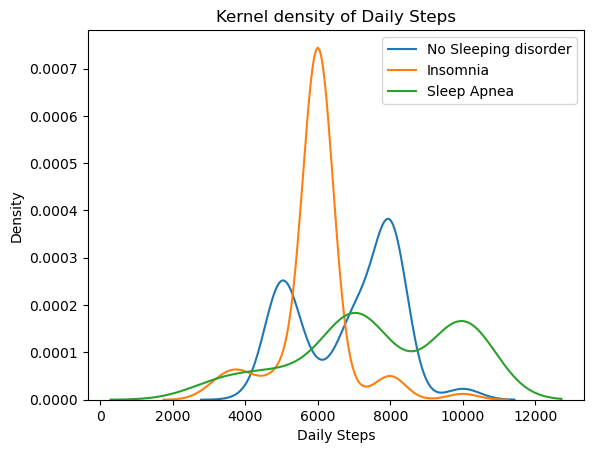

In [16]:
#Relationship between Target and numerical variables
no_disorder = sleep_data[sleep_data['Sleep Disorder'] == 'None']
insomnia = sleep_data[sleep_data['Sleep Disorder'] == 'Insomnia']
sleep_apnea = sleep_data[sleep_data['Sleep Disorder'] == 'Sleep Apnea']

for kd in sleep_data.select_dtypes(include=["float","int"]):
    plt.figure()
    sns.kdeplot(no_disorder[kd], label='No Sleeping disorder')
    sns.kdeplot(insomnia[kd], label='Insomnia')
    sns.kdeplot(sleep_apnea[kd], label='Sleep Apnea')
    plt.title(f'Kernel density of {kd}')
    plt.legend()

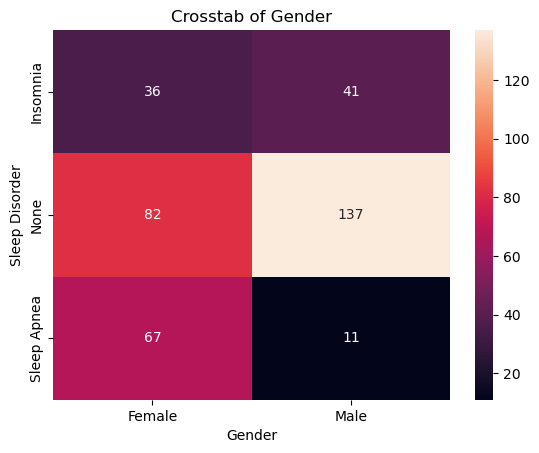

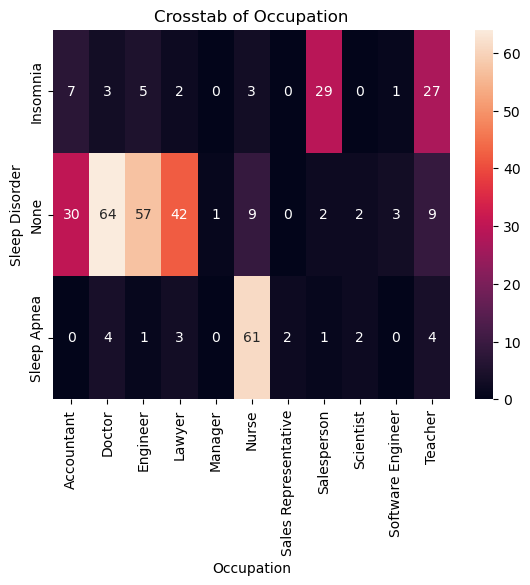

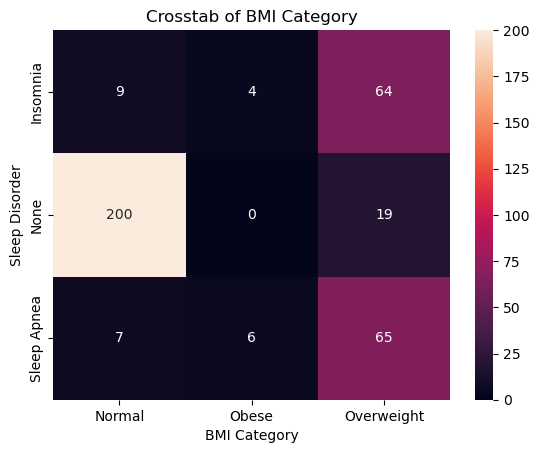

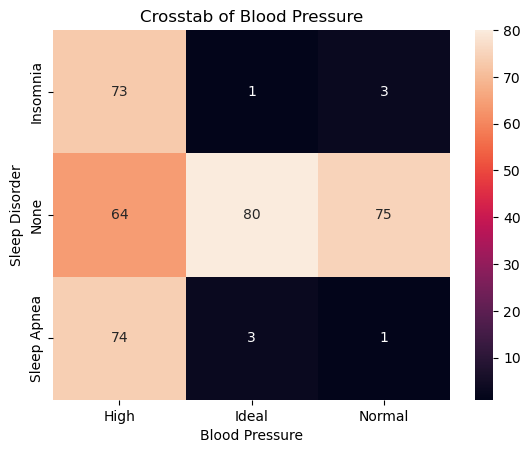

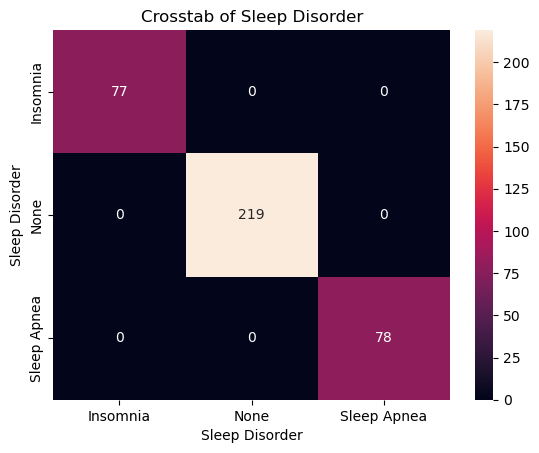

In [17]:
#Relationship between Target and categorical variables
for kd in sleep_data.select_dtypes(include='object'):
    plt.figure()
    sns.heatmap(pd.crosstab( sleep_data['Sleep Disorder'],sleep_data[kd]), annot=True, fmt='d')
    plt.title(f'Crosstab of {kd}')

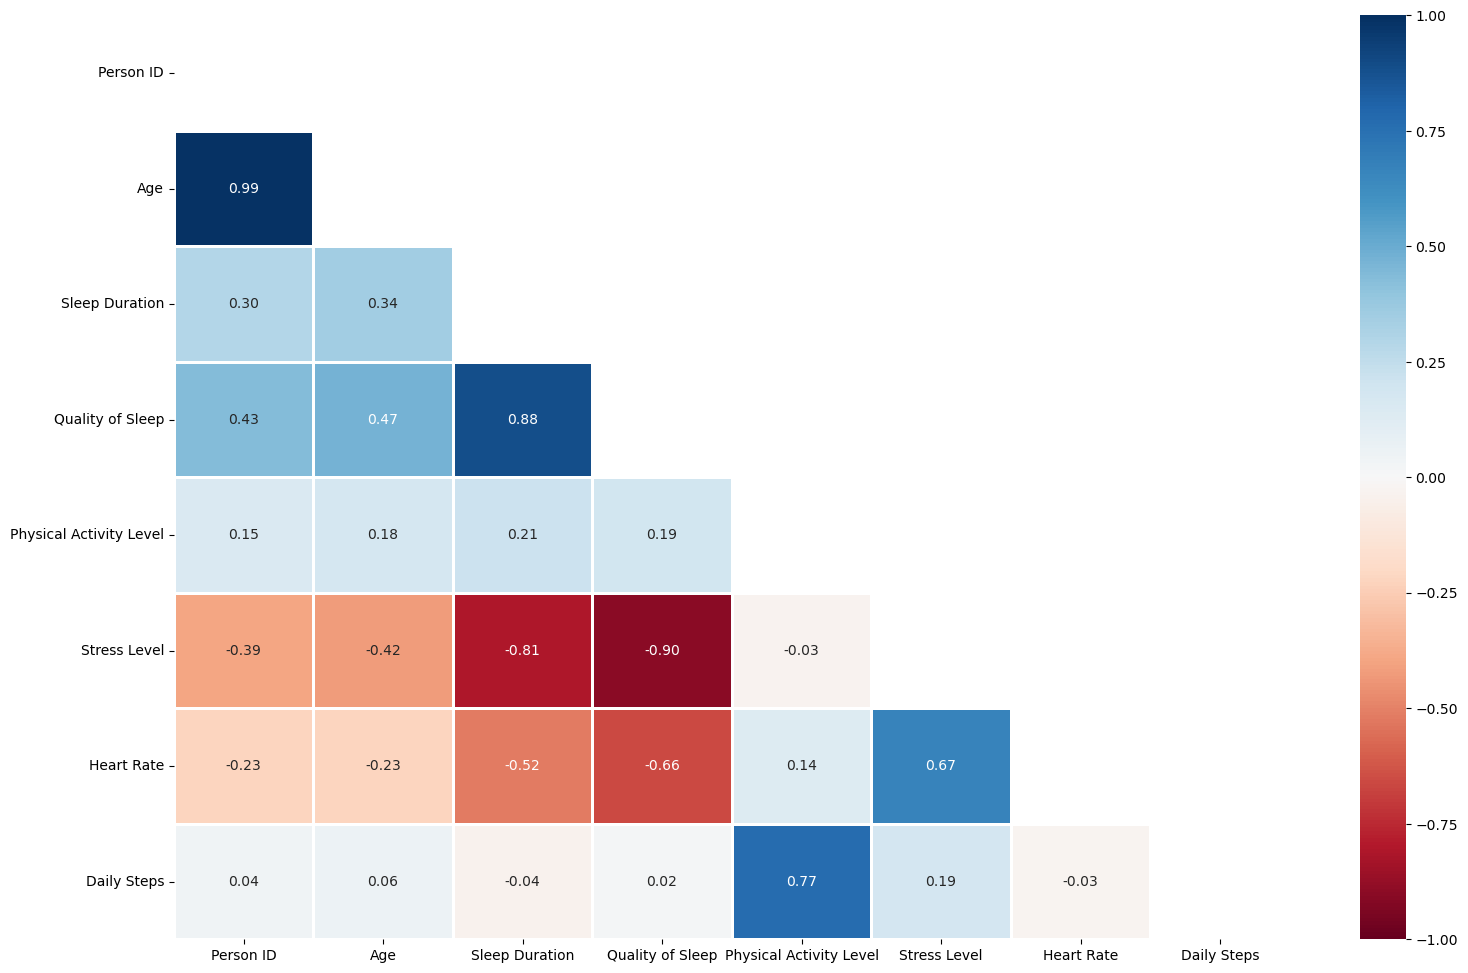

In [18]:
#Relationship between variables
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(sleep_data.corr(), dtype=bool))
sns.heatmap(sleep_data.corr(), mask = mask, center=0, cmap ="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Quality of Sleep', ylabel='Physical Activity Level'>

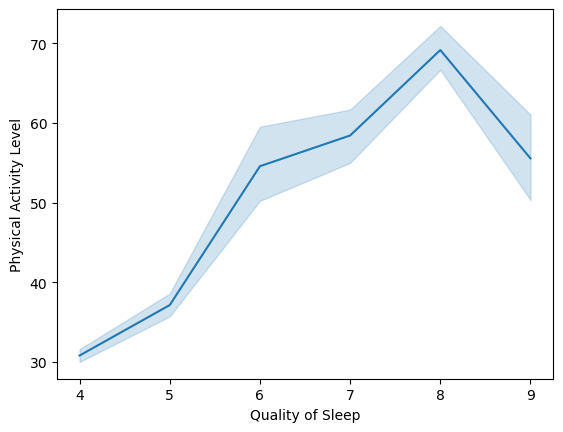

In [19]:
sns.lineplot(x='Quality of Sleep', y='Physical Activity Level' ,data=sleep_data)

<Axes: xlabel='Quality of Sleep', ylabel='Age'>

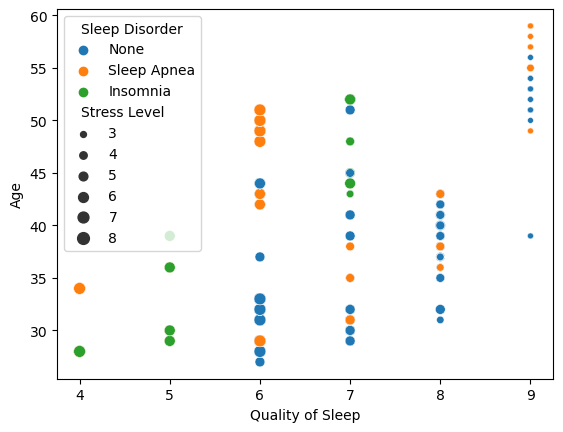

In [20]:
sns.scatterplot(x='Quality of Sleep',y='Age', hue='Sleep Disorder', size = 'Stress Level', data=sleep_data)

<Axes: xlabel='Gender', ylabel='Age'>

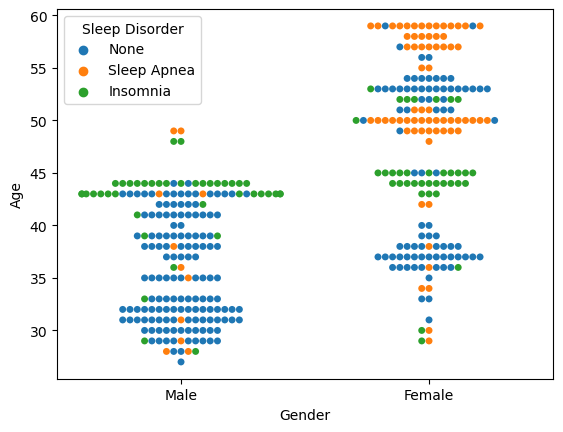

In [21]:
sns.swarmplot(x='Gender',y='Age', hue='Sleep Disorder', data=sleep_data)

<Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>

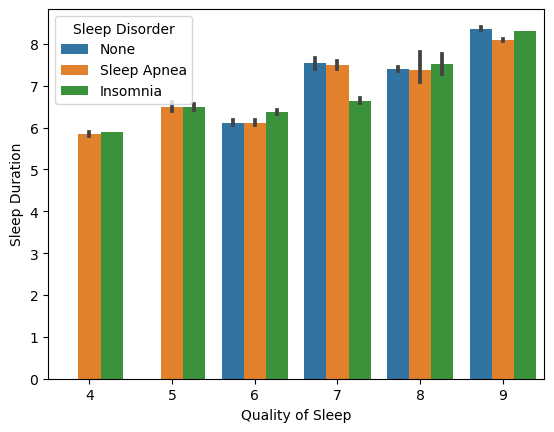

In [22]:
sns.barplot(x='Quality of Sleep', y='Sleep Duration', hue='Sleep Disorder', data=sleep_data)

In [23]:
#homogeneity of variance test: Levene
alpha = 0.05
for col in sleep_data.select_dtypes(include=['int','float']):
    stat,p = levene(no_disorder[col],insomnia[col],sleep_apnea[col])
    if p<alpha:
          print(f'H0 Rejected for {col}')
    else:
        print(f'H0 Accepted for {col}')

H0 Rejected for Person ID
H0 Rejected for Age
H0 Rejected for Sleep Duration
H0 Rejected for Quality of Sleep
H0 Rejected for Physical Activity Level
H0 Rejected for Stress Level
H0 Rejected for Heart Rate
H0 Rejected for Daily Steps


In [24]:
#Kruskal wallis test
def krus(col):
    alpha=0.05
    statistic, p_value=kruskal(no_disorder[col],insomnia[col],sleep_apnea[col])
    if p_value < alpha:
        return 'H0 Rejected'
    else:
        return 0

In [25]:
for col in sleep_data.select_dtypes(include=['int','float']):
    print(f'{col:-<50}{krus(col)}')

Person ID-----------------------------------------H0 Rejected
Age-----------------------------------------------H0 Rejected
Sleep Duration------------------------------------H0 Rejected
Quality of Sleep----------------------------------H0 Rejected
Physical Activity Level---------------------------H0 Rejected
Stress Level--------------------------------------H0 Rejected
Heart Rate----------------------------------------H0 Rejected
Daily Steps---------------------------------------H0 Rejected


In [26]:
#chi2 test
alpha = 0.05
for col in sleep_data.select_dtypes(include='object'):
    result = chi2_contingency(pd.crosstab( sleep_data['Sleep Disorder'],sleep_data[col]))
    stats, p , dof, expected=result
    if p < alpha:
          print(f'H0 Rejected for {col}')
    else:
        print(f'H0 Accepted for {col}')

H0 Rejected for Gender
H0 Rejected for Occupation
H0 Rejected for BMI Category
H0 Rejected for Blood Pressure
H0 Rejected for Sleep Disorder


## Summary of The Exploratory Analysis:
- I began the exploratory analysis by defining the target variable and visualizing it. I found that 58.6% have the value "None", meaning that 58.6% of the people don't have sleep disorder.20.9% have sleep apnea and 20.6% have insomnia.
- The numerical variables are not normally distributed ; the null hypothesis suggesting that the data are normally distributed was rejected by a normality test, the Shapiro-Wilk test.
- Nurse has the most values in the Occupation variable while Manager has the least values.
- Males are slightly more than females .
- Most people have Normal BMI, only few people are obese
- More than 200 people have high blood pressure.
- The bivariate analysis shows that there is a strong positive linear relationship between Daily steps and physical activity level, Sleep duration and Quality of sleep, Stress Level Heart Rate ; there is also a strong negative relationship between Quality of sleep and Stress Level, Quality of sleep and  heart rate, Stress Level Sleep Duration.
- I then explored the relationship between the target variable and the other variables. This allowed me to formulate this hypothesis:
    - H0: there is no difference between people who have Sleep disorder and those that do not.
- The null hypothesis was rejected for all  variables using the Kruskal-Wallis test and chi2 test. This allows me to conclude that there is a statistically significant difference between people who have Sleep disorder and those that do not . allow us to conclude: 
    - Those whose occupation is Accountant, Doctor, Engineer, Lawyer are less likely to have a sleep disorder  nurses have a high chance of sleep apnea, Salespersons and Teachers are more likely to have insomnia
    - Overweight people have a high chance to suffer from a sleep disorder and people with an ideal or normal Blood pressure are less likely to have a sleep disorder.
    - People between the ages of 50 and 60 have low stress levels, a sleep quality of around 9, but are susceptible to sleep apnea 
    - Men and women aged between 42 and 45 are very likely to have insomnia, and women of 50 and above 55 have a very high chance of having sleep apnea

## QUESTIONS:
1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?
## ANSWERS:
1. Factors that can contribute to a sleep disorder: 
    - High blood pressure, obesity, working as a nurse, being a female of more than 40 years
2. Yes, an increased physical activity level result in a better quality of sleep
3. The presence of a sleep disorder does not affect the subjective sleep quality metric

# DATA MODELLING

## PREPROCESSING

In [27]:
#Encoding 
columns_to_encode = ['Gender','Occupation','BMI Category','Blood Pressure']
df = pd.get_dummies(sleep_data, columns=columns_to_encode, drop_first = True, dtype = int)
df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight,Blood Pressure_Ideal,Blood Pressure_Normal
0,1,27,6.1,6,42,6,77,4200,None,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,2,28,6.2,6,60,8,75,10000,None,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,28,6.2,6,60,8,75,10000,None,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,28,5.9,4,30,8,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,28,5.9,4,30,8,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [28]:
#LabelEncoder
label  = LabelEncoder()
df['Sleep Disorder'] = label.fit_transform(df['Sleep Disorder'])

In [29]:
#Split the dataset
X= df.drop('Sleep Disorder', axis=1)
y= df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [30]:
#base model
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = classification_report(y_test, y_pred)
print(model_performance)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.91      0.98      0.94        43
           2       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75



In [31]:
# comparison Model
tree =  DecisionTreeClassifier()
tree.fit(X_train, y_train)
predict = tree.predict(X_test)
performance = classification_report(y_test, predict)
print(performance)


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      1.00      0.97        43
           2       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.87      0.83      0.85        75
weighted avg       0.89      0.89      0.89        75



In [32]:
#Baseline Model perform better, let's see the learning curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation accuracy")

    plt.legend()
    plt.show()

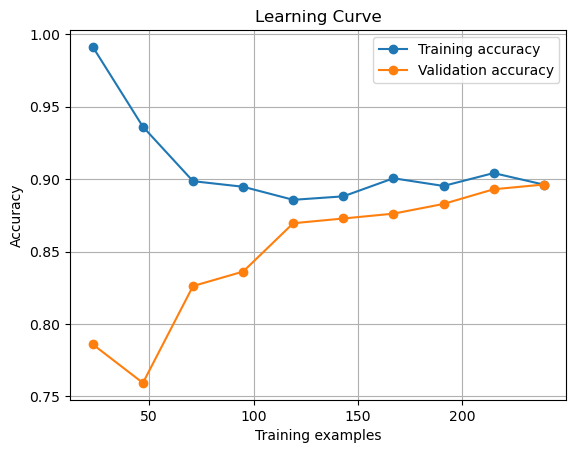

In [33]:
#learning curve
plot_learning_curve(log_reg, X_train, y_train, cv=5)

In [34]:
#feature importance
features_dict = dict(zip(df.drop("Sleep Disorder",axis=1).columns, list(log_reg.coef_[0])))
features_dict

{'Person ID': 0.0074118117815373955,
 'Age': -0.011105677161376096,
 'Sleep Duration': -0.19732013692906236,
 'Quality of Sleep': -0.14459034751886518,
 'Physical Activity Level': -0.042395149221984126,
 'Stress Level': -0.07680403010602926,
 'Heart Rate': 0.05431789949888452,
 'Daily Steps': 4.780141719685512e-06,
 'Gender_Male': 0.2819094916025437,
 'Occupation_Doctor': -0.13189722503820606,
 'Occupation_Engineer': -0.1961680701193711,
 'Occupation_Lawyer': 0.022042556849125452,
 'Occupation_Manager': -0.027374488180102297,
 'Occupation_Nurse': -0.32182318610085636,
 'Occupation_Sales Representative': -0.04016268826567427,
 'Occupation_Salesperson': 0.32619583084254683,
 'Occupation_Scientist': -0.10844259481301859,
 'Occupation_Software Engineer': -0.0014581878553367672,
 'Occupation_Teacher': 0.4802695407165343,
 'BMI Category_Obese': 0.028596566541715798,
 'BMI Category_Overweight': 0.3832055270004823,
 'Blood Pressure_Ideal': -0.09470999854623303,
 'Blood Pressure_Normal': -0.528

<Axes: title={'center': 'Feature Importance'}>

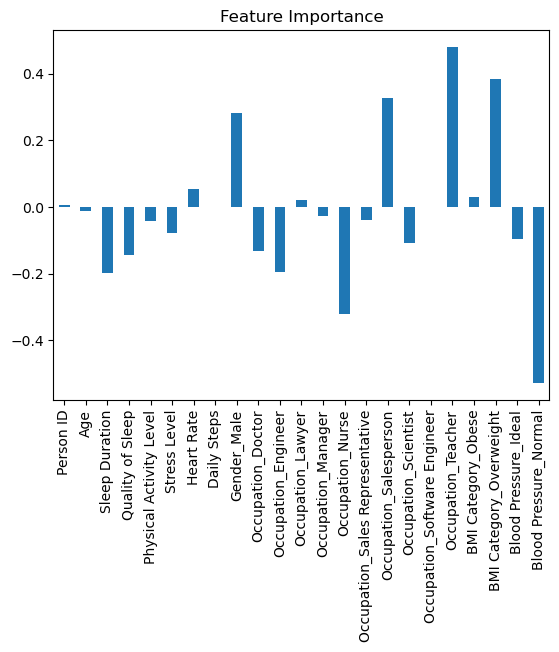

In [35]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False)

In [36]:
import joblib
joblib.dump(log_reg,'model.pkl')

['model.pkl']

In [37]:
Lr = joblib.load('model.pkl')

In [38]:
Lr

LogisticRegression(max_iter=2000, multi_class='multinomial')